# RNN

In [14]:
import pandas as pd
import numpy as np
np.random.seed(42)
input_size = 5
output_size = 2
hidden_size = 5
seq_length = 4
W_x = np.random.randn(hidden_size, input_size)
W_h = np.random.randn(hidden_size, hidden_size)
W_y = np.random.randn(output_size, hidden_size)

b_h = np.random.randn(hidden_size, 1)
b_y = np.random.randn(output_size, 1)

X = np.random.randn(seq_length, input_size,1)

# Matriz de ceros porque no ha aprendido nada
h_t = np.zeros((hidden_size, 1))

# Vector para almacenar salidas

outputs = []

for t in range(seq_length):
    x_t = X[t]
    h_t = np.tanh(np.dot(W_x, x_t) + np.dot(W_h, h_t) + b_h)
    y_t = np.dot(W_y, h_t) + b_y
    outputs.append(y_t)

print(outputs)

[array([[1.90842793],
       [0.0617969 ]]), array([[-0.70987868],
       [-2.93469701]]), array([[ 0.64581326],
       [-1.33177074]]), array([[ 1.71338594],
       [-0.85951545]])]


In [ ]:
import tensorflow as tf
import numpy as np

input_size = 5
hidden_size = 5
output_size = 2
seq_length = 4
batch_size = 1  

rnn_layer = tf.keras.layers.SimpleRNN(hidden_size, return_sequences=True, return_state=True)

dense_layer = tf.keras.layers.Dense(output_size)

X = np.random.randn(batch_size, seq_length, input_size).astype(np.float32)  

h0 = tf.zeros((batch_size, hidden_size)) 

rnn_outputs, final_state = rnn_layer(X, initial_state=h0)

outputs = dense_layer(rnn_outputs)

print("Salidas en cada paso de tiempo:")
print(outputs)

Salidas en cada paso de tiempo:
tf.Tensor(
[[[ 0.7220137   0.03767417]
  [ 0.76661855  0.11697214]
  [-0.8702703  -0.03505469]
  [ 1.5150961   0.05160101]]], shape=(1, 4, 2), dtype=float32)


# Ejercicio 

Epoch 1/30
18/18 [==============================] - 1s 16ms/step - loss: 543.8067 - mae: 22.1608 - val_loss: 145.8970 - val_mae: 11.4927
Epoch 2/30
18/18 [==============================] - 0s 8ms/step - loss: 450.9611 - mae: 19.9671 - val_loss: 102.2737 - val_mae: 9.3701
Epoch 3/30
18/18 [==============================] - 0s 7ms/step - loss: 387.8573 - mae: 18.2772 - val_loss: 72.7827 - val_mae: 7.6379
Epoch 4/30
18/18 [==============================] - 0s 7ms/step - loss: 335.6066 - mae: 16.7143 - val_loss: 51.9708 - val_mae: 6.2056
Epoch 5/30
18/18 [==============================] - 0s 7ms/step - loss: 282.5208 - mae: 15.1466 - val_loss: 38.2124 - val_mae: 5.0796
Epoch 6/30
18/18 [==============================] - 0s 8ms/step - loss: 245.1887 - mae: 13.9007 - val_loss: 28.4717 - val_mae: 4.2356
Epoch 7/30
18/18 [==============================] - 0s 7ms/step - loss: 214.3834 - mae: 12.8500 - val_loss: 22.6131 - val_mae: 3.6761
Epoch 8/30
18/18 [==============================] - 0s 7ms

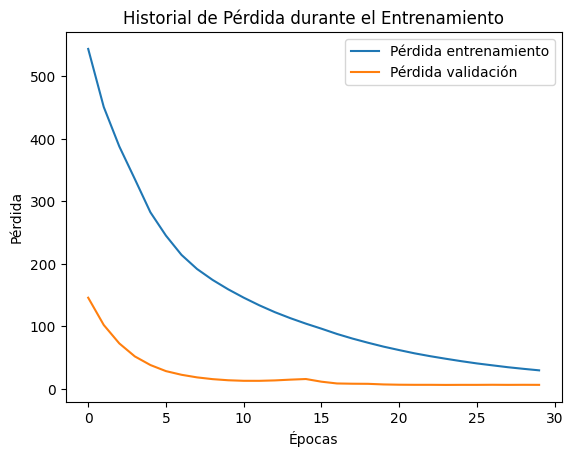

3/3 [==============================] - 0s 2ms/step


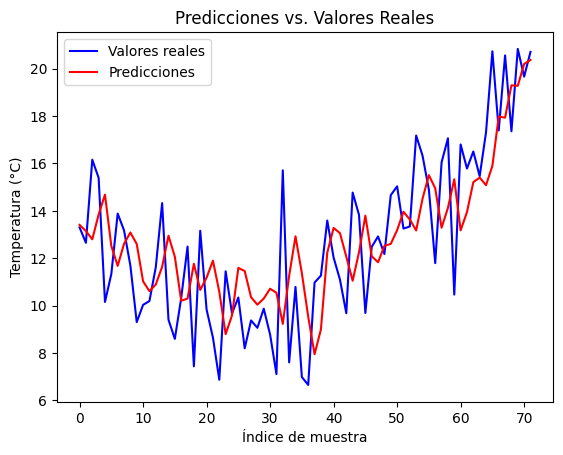

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Generar datos climáticos (temperaturas diarias simuladas)
def generate_weather_data(seq_length, num_samples):
    # Simular temperaturas con ruido
    base_temperature = 20 + 10 * np.sin(np.linspace(0, 4 * np.pi, num_samples))  # Patrones periódicos
    noise = np.random.randn(num_samples) * 2  # Añadir ruido aleatorio
    temperatures = base_temperature + noise
    
    # Crear secuencias de entrada y salidas (predecir el siguiente día)
    X = []
    y = []
    for i in range(num_samples - seq_length):
        X.append(temperatures[i:i+seq_length])
        y.append(temperatures[i+seq_length])  # El siguiente día es la salida
    
    X = np.array(X).reshape(-1, seq_length, 1)  # (muestras, secuencia, característica)
    y = np.array(y).reshape(-1, 1)  # (muestras, salida)
    
    return X, y

# Parámetros de los datos
seq_length = 7  # Usar 7 días de temperaturas para predecir el siguiente
num_samples = 365  # Simular 1 año de datos climáticos

# Generar datos climáticos
X, y = generate_weather_data(seq_length, num_samples)

# Dividir los datos en entrenamiento y validación
train_size = int(0.8 * X.shape[0])
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:], y[train_size:]

# 2. Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(1)  # Predicción de un único valor (temperatura siguiente)
])

# 3. Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 4. Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=16)

# 5. Visualizar el historial de pérdida
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Historial de Pérdida durante el Entrenamiento')
plt.show()

# 6. Realizar predicciones
predictions = model.predict(X_val)

# 7. Visualizar predicciones vs. valores reales
plt.plot(y_val, label='Valores reales', color='blue')
plt.plot(predictions, label='Predicciones', color='red')
plt.xlabel('Índice de muestra')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.title('Predicciones vs. Valores Reales')
plt.show()

# GRU (Gated Recurrent Unit)

## Ejercicio predecir palabra

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Cargar el archivo .txt y preprocesar los datos
def load_and_preprocess_data(file_path, sequence_length=5):
    # Leer el archivo
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    # Convertir texto a minúsculas y dividirlo en palabras
    text = text.lower()
    words = text.split()
    
    # Tokenizar las palabras
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(words)
    vocab_size = len(tokenizer.word_index) + 1  # Aumentar 1 para el índice del token 0
    
    # Convertir palabras a índices
    sequences = []
    for i in range(sequence_length, len(words)):
        seq = words[i-sequence_length:i]
        seq.append(words[i])  # La palabra a predecir
        sequences.append(tokenizer.texts_to_sequences([' '.join(seq)])[0])
    
    # Dividir en entradas (X) y salida (y)
    sequences = np.array(sequences)
    X, y = sequences[:, :-1], sequences[:, -1]
    y = to_categorical(y, num_classes=vocab_size)  # Codificación one-hot
    
    return X, y, tokenizer, vocab_size

# Ruta al archivo .txt
file_path = "capitulo_libro.txt"

# Preprocesar los datos
sequence_length = 5
X, y, tokenizer, vocab_size = load_and_preprocess_data(file_path, sequence_length)

# 2. Crear el modelo basado en GRU
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 50, input_length=sequence_length),  # Capa de embedding
    tf.keras.layers.GRU(128, return_sequences=False),  # Capa GRU
    tf.keras.layers.Dense(vocab_size, activation='softmax')  # Salida con probabilidad por palabra
])

# 3. Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Entrenar el modelo
model.fit(X, y, epochs=20, batch_size=64, verbose=1)

# 5. Generar predicciones
def predict_next_word(model, tokenizer, input_text, sequence_length):
    # Convertir la entrada en secuencia
    tokenized_input = tokenizer.texts_to_sequences([input_text])[0]
    tokenized_input = pad_sequences([tokenized_input], maxlen=sequence_length, padding='pre')
    
    # Predecir el siguiente token
    predicted_index = np.argmax(model.predict(tokenized_input), axis=-1)
    predicted_word = tokenizer.index_word[predicted_index[0]]
    return predicted_word

# Ejemplo de predicción
input_text = "el clima hoy es"
predicted_word = predict_next_word(model, tokenizer, input_text, sequence_length)
print(f"Texto de entrada: '{input_text}'")
print(f"Siguiente palabra predicha: '{predicted_word}'")